In [1]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.svm import SVR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
data = pd.read_csv('ortho.csv')
x = data.iloc[:,2:11].values
y = data.iloc[:,11:14].values
print(np.shape(data))
data.head(n=10)

(152, 17)


,index,compounds,rA (A),rB(A),rX (A),vA,vB,vX,eA,eB,eX,a (A),b (A),c (A),a (A) [5],b (A) [5],c (A) [5]
0,NaN,NaUO3,1.39,0.760,1.4,1,5,-2,0.93,1.38,3.44,5.775,5.905,8.250,5.607,5.627,8.020
1,NaN,NaTaO3,1.39,0.640,1.4,1,5,-2,0.93,1.50,3.44,5.494,5.513,7.751,5.415,5.434,7.745
2,NaN,NaNbO3,1.39,0.640,1.4,1,5,-2,0.93,1.60,3.44,5.510,5.570,7.770,5.415,5.434,7.745
3,NaN,NaPaO3,1.39,0.780,1.4,1,5,-2,0.93,1.50,3.44,5.820,5.920,8.360,5.639,5.659,8.065
4,NaN,CaMnO3,1.34,0.530,1.4,2,4,-2,1.00,1.55,3.44,5.270,5.275,7.464,5.292,5.312,7.519
5,NaN,CaCrO3,1.34,0.550,1.4,2,4,-2,1.00,1.66,3.44,5.287,5.316,7.486,5.324,5.345,7.565
6,NaN,CaVO3,1.34,0.580,1.4,2,4,-2,1.00,1.63,3.44,5.326,5.352,7.547,5.374,5.394,7.635
7,NaN,CaTiO3,1.34,0.605,1.4,2,4,-2,1.00,1.54,3.44,5.381,5.443,7.645,5.415,5.436,7.694
8,NaN,CaRuO3,1.34,0.680,1.4,2,4,-2,1.00,2.20,3.44,5.360,5.530,7.670,5.538,5.559,7.869
9,NaN,CaMoO3,1.34,0.650,1.4,2,4,-2,1.00,2.16,3.44,5.450,5.580,7.800,5.489,5.510,7.799


In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
cvs_svr_linear = np.zeros(10)
cvs_svr_rbf = np.zeros(10)
r = np.zeros(24)
C = [1, 5, 10, 25, 50, 75, 100]
epsilon = np.arange(0.01, 0.5, 0.02)
gamma = np.arange(1, 25, 1)
ep = np.zeros(len(epsilon))
ep1 = np.zeros(len(C))
r1 = np.zeros(len(gamma))
r2 = np.zeros(len(epsilon))
r3 = np.zeros(len(C))
for i in range(len(C)):
    for j in range(len(epsilon)):
        for k in range(len(gamma)):
            cvs_svr_linear = cross_val_score(SVR(kernel='linear', C= C[i], epsilon= epsilon[j], gamma= gamma[k]), x_train, y_train[:,0], cv=5, scoring='r2', n_jobs=-1)
            cvs_svr_rbf = cross_val_score(SVR(kernel='rbf', C= C[i], epsilon= epsilon[j], gamma= gamma[k]), x_train, y_train[:,0], cv=5, scoring='r2', n_jobs=-1)
            r1[k] = np.mean(cvs_svr_rbf)
        #print('Rbf',np.max(r1), C[i], epsilon[j], gamma[np.argmax(r1)])
        r2[j] = np.max(r1)
        ep[j] = np.mean(cvs_svr_linear)
        #print('Linear',np.mean(cvs_svr_linear), C[i], epsilon[j])
    ep1[i] = np.max(ep)
    r3[i] = np.max(r2)
#rbf[l]=np.max(r3)
#linear[l]=np.max(ep1)
#lr[l]=np.mean(cvs_linear)
print('Rbf',np.max(r3), C[np.argmax(r3)], epsilon[np.argmax(r2)], gamma[np.argmax(r1)])
print('Linear',np.max(ep1), C[np.argmax(ep1)], epsilon[np.argmax(ep)])


Rbf 0.8875630944696826 10 0.049999999999999996 1
Linear 0.9266403256074242 100 0.01


In [5]:
cvs_svr_linear = np.zeros(10)
cvs_svr_rbf = np.zeros(10)
r = np.zeros(24)
C = [1, 5, 10, 25, 50, 75, 100]
epsilon = np.arange(0.01, 0.5, 0.02)
gamma = np.arange(1, 25, 1)
ep = np.zeros(len(epsilon))
ep1 = np.zeros(len(C))
r1 = np.zeros(len(gamma))
r2 = np.zeros(len(epsilon))
r3 = np.zeros(len(C))
for i in range(len(C)):
    for j in range(len(epsilon)):
        for k in range(len(gamma)):
            cvs_svr_linear = cross_val_score(SVR(kernel='linear', C= C[i], epsilon= epsilon[j], gamma= gamma[k]), x_train, y_train[:,1], cv=5, scoring='r2', n_jobs=-1)
            cvs_svr_rbf = cross_val_score(SVR(kernel='rbf', C= C[i], epsilon= epsilon[j], gamma= gamma[k]), x_train, y_train[:,1], cv=5, scoring='r2', n_jobs=-1)
            r1[k] = np.mean(cvs_svr_rbf)
        #print('Rbf',np.max(r1), C[i], epsilon[j], gamma[np.argmax(r1)])
        r2[j] = np.max(r1)
        ep[j] = np.mean(cvs_svr_linear)
        #print('Linear',np.mean(cvs_svr_linear), C[i], epsilon[j])
    ep1[i] = np.max(ep)
    r3[i] = np.max(r2)
#rbf[l]=np.max(r3)
#linear[l]=np.max(ep1)
#lr[l]=np.mean(cvs_linear)
print('Rbf',np.max(r3), C[np.argmax(r3)], epsilon[np.argmax(r2)], gamma[np.argmax(r1)])
print('Linear',np.max(ep1), C[np.argmax(ep1)], epsilon[np.argmax(ep)])


Rbf 0.7868992605890318 75 0.01 1
Linear 0.6250821739999979 10 0.049999999999999996


In [6]:
cvs_svr_linear = np.zeros(10)
cvs_svr_rbf = np.zeros(10)
r = np.zeros(24)
C = [1, 5, 10, 25, 50, 75, 100]
epsilon = np.arange(0.01, 0.5, 0.02)
gamma = np.arange(1, 25, 1)
ep = np.zeros(len(epsilon))
ep1 = np.zeros(len(C))
r1 = np.zeros(len(gamma))
r2 = np.zeros(len(epsilon))
r3 = np.zeros(len(C))
for i in range(len(C)):
    for j in range(len(epsilon)):
        for k in range(len(gamma)):
            cvs_svr_linear = cross_val_score(SVR(kernel='linear', C= C[i], epsilon= epsilon[j], gamma= gamma[k]), x_train, y_train[:,2], cv=5, scoring='r2', n_jobs=-1)
            cvs_svr_rbf = cross_val_score(SVR(kernel='rbf', C= C[i], epsilon= epsilon[j], gamma= gamma[k]), x_train, y_train[:,2], cv=5, scoring='r2', n_jobs=-1)
            r1[k] = np.mean(cvs_svr_rbf)
        #print('Rbf',np.max(r1), C[i], epsilon[j], gamma[np.argmax(r1)])
        r2[j] = np.max(r1)
        ep[j] = np.mean(cvs_svr_linear)
        #print('Linear',np.mean(cvs_svr_linear), C[i], epsilon[j])
    ep1[i] = np.max(ep)
    r3[i] = np.max(r2)
#rbf[l]=np.max(r3)
#linear[l]=np.max(ep1)
#lr[l]=np.mean(cvs_linear)
print('Rbf',np.max(r3), C[np.argmax(r3)], epsilon[np.argmax(r2)], gamma[np.argmax(r1)])
print('Linear',np.max(ep1), C[np.argmax(ep1)], epsilon[np.argmax(ep)])


Rbf 0.8162679346548003 75 0.01 1
Linear 0.8355380736047995 100 0.03


In [96]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [97]:
#f1 = SVR(kernel='rbf', C=10, epsilon=0.05, gamma=1)

In [98]:
#f1.fit(x_train, y_train[:,0])

In [99]:
#f1.predict(x_test)
f4 = SVR(kernel='linear', C=100, epsilon=0.01)
f4.fit(x_train, y_train[:,0])

SVR(C=100, epsilon=0.01, kernel='linear')

In [100]:
train_err1 = np.abs(y_train[:,0]-f4.predict(x_train))*100/y_train[:,0]

In [101]:
print(f'Mean training error (in %) for a is {np.mean(train_err1)} with range({np.min(train_err1)}, {np.max(train_err1)})')

Mean training error (in %) for a is 0.5561313872685357 with range(0.007609540632797125, 4.318823650906472)


In [102]:
test_err1 = np.abs(y_test[:,0]-f4.predict(x_test))*100/y_test[:,0]
print(f'Mean testing error (in %) for a is {np.mean(test_err1)} with range({np.min(test_err1)}, {np.max(test_err1)})')

Mean testing error (in %) for a is 0.4962135857777029 with range(0.09309500147701934, 2.044150949839878)


In [103]:
f2 = SVR(kernel='rbf', C=75, epsilon=0.01, gamma=1)
f2.fit(x_train, y_train[:,1])

SVR(C=75, epsilon=0.01, gamma=1)

In [104]:
train_err2 = np.abs(y_train[:,1]-f2.predict(x_train))*100/y_train[:,1]
print(f'Mean training error (in %) for b is {np.mean(train_err2)} with range ({np.min(train_err2)}, {np.max(train_err2)})')

Mean training error (in %) for b is 0.5790089466178376 with range (0.00013937286533658675, 6.10753525116761)


In [105]:
test_err2 = np.abs(y_test[:,1]-f2.predict(x_test))*100/y_test[:,1]
print(f'Mean testing error (in %) for b is {np.mean(test_err2)} with range ({np.min(test_err2)}, {np.max(test_err2)})')

Mean testing error (in %) for b is 0.8802745447667063 with range (0.003316918119947216, 3.7234452556478925)


In [106]:
f3 = SVR(kernel='linear', C=100, epsilon=0.03)
f3.fit(x_train, y_train[:,2])

SVR(C=100, epsilon=0.03, kernel='linear')

In [107]:
train_err3 = np.abs(y_train[:,2]-f3.predict(x_train))*100/y_train[:,2]
print(f'Mean training error (in %) for c is {np.mean(train_err3)} with range ({np.min(train_err3)}, {np.max(train_err3)})')

Mean training error (in %) for c is 0.7388880876113172 with range (0.0020418850848272535, 7.185586851657138)


In [108]:
test_err3 = np.abs(y_test[:,2]-f3.predict(x_test))*100/y_test[:,2]
print(f'Mean testing error (in %) for c is {np.mean(test_err3)} with range ({np.min(test_err3)}, {np.max(test_err3)})')

Mean testing error (in %) for c is 0.7798633937750573 with range (0.037474399040793166, 3.308617929945035)


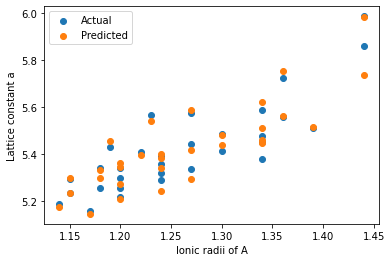

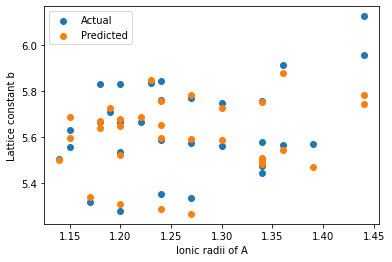

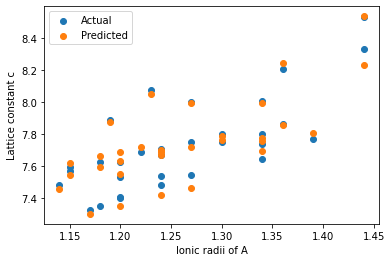

In [71]:
s9 = plt.scatter(x_test[:,0], y_test[:,0])
s10 = plt.scatter(x_test[:,0], f4.predict(x_test))
plt.xlabel('Ionic radii of A')
plt.ylabel('Lattice constant a')
plt.legend((s9,s10),('Actual','Predicted'))
plt.show()
s1 = plt.scatter(x_test[:,0], y_test[:,1])
s2 = plt.scatter(x_test[:,0], f2.predict(x_test))
plt.xlabel('Ionic radii of A')
plt.ylabel('Lattice constant b')
plt.legend((s1,s2),('Actual','Predicted'))
plt.show()
s3 = plt.scatter(x_test[:,0], y_test[:,2])
s4 = plt.scatter(x_test[:,0], f3.predict(x_test))
plt.xlabel('Ionic radii of A')
plt.ylabel('Lattice constant c')
plt.legend((s3,s4),('Actual','Predicted'))
plt.show()

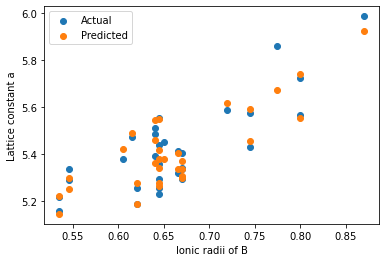

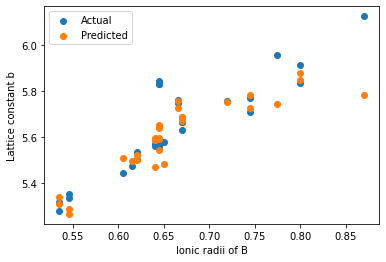

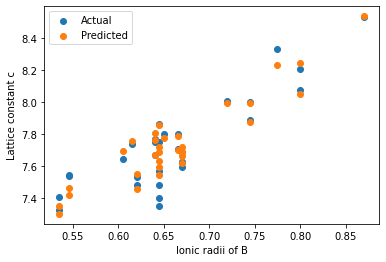

In [64]:
s11 = plt.scatter(x_test[:,1], y_test[:,0])
s12 = plt.scatter(x_test[:,1], f1.predict(x_test))
plt.xlabel('Ionic radii of B')
plt.ylabel('Lattice constant a')
plt.legend((s11,s12),('Actual','Predicted'))
plt.show()
s5 = plt.scatter(x_test[:,1], y_test[:,1])
s6 = plt.scatter(x_test[:,1], f2.predict(x_test))
plt.xlabel('Ionic radii of B')
plt.ylabel('Lattice constant b')
plt.legend((s5,s6),('Actual','Predicted'))
plt.show()
s7 = plt.scatter(x_test[:,1], y_test[:,2])
s8 = plt.scatter(x_test[:,1], f3.predict(x_test))
plt.xlabel('Ionic radii of B')
plt.ylabel('Lattice constant c')
plt.legend((s7,s8),('Actual','Predicted'))
plt.show()


In [69]:
f4 = SVR(kernel='linear', C=100, epsilon=0.01)
f4.fit(x_train, y_train[:,0])

SVR(C=100, epsilon=0.01, kernel='linear')

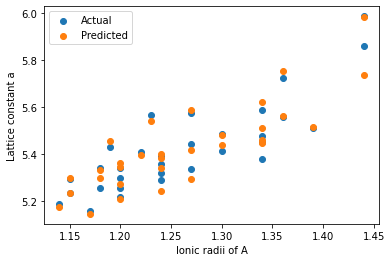

In [70]:
s13 = plt.scatter(x_test[:,0], y_test[:,0])
s14 = plt.scatter(x_test[:,0], f4.predict(x_test))
plt.xlabel('Ionic radii of A')
plt.ylabel('Lattice constant a')
plt.legend((s9,s10),('Actual','Predicted'))
plt.show()